<a href="https://colab.research.google.com/github/Quja11/BAaS/blob/main/Tahaev_Regression_Supercomputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Высокопроизводительная аналитика на суперкомпьютере** \
Тахаев А.Г. \
ПИ-321

**Подготовка к работе**

In [1]:
#Импорт библиотеки времени, работы с числовыми массивами, построения графиков и машинного обучения
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#Создание переменной reg для построения модели линейной регрессии
reg = linear_model.LinearRegression()

#Задаем начальное состояние генератора, используя номер зачетки
np.random.seed(19130600) #Номер зачетки

#Создаем 3 пустых списка, где A - оценки св.члена, B - оценки коэф.регрессии, T - длительность вычислений
A = []
B = []
T = []

#Создаем параметры эксперимента, где N - объем выборки, n - число прогонок
N = 10000
n = 1000

**Вычисления в цикле**

In [2]:
#Вычисления в цикле n раз, построение модели линейной регрессии, собирания оценок в массивы, оценка распределения будущих результатов
for i in range(n):
  t = time.time()
  x = np.random.uniform(low = 150, high = 200, size = N)
  e = np.random.normal(loc = 0, scale = 10, size = N)
  y = -100 + x + e
  reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))
  A.append(reg.intercept_[0])
  B.append(reg.coef_[0][0])
  T.append(time.time() - t)

**Анализ распределения**

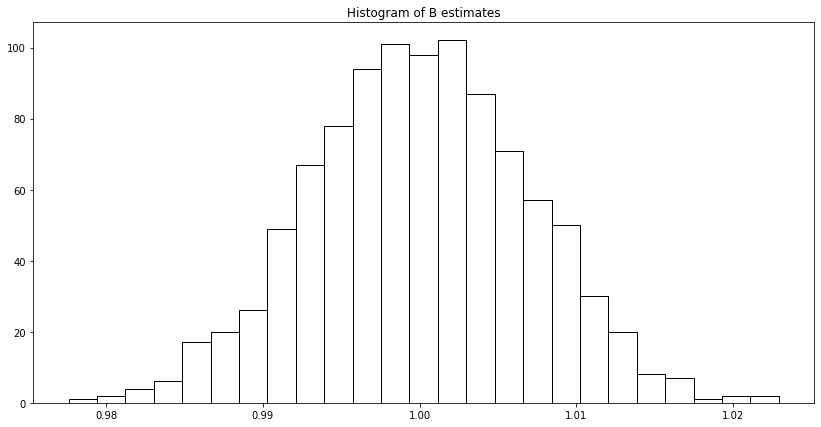

In [3]:
#Задаем размер графика в дюймах
plt.figure(figsize = (14, 7))

#Строим гистограмму с помощью функции hist для коэф-а регрессии B, настраиваем цвет границ и заливку, создаем заголовок и выводим
plt.hist(B, bins = 25, edgecolor = "black", color = "white")
plt.title("Histogram of B estimates")
plt.show()

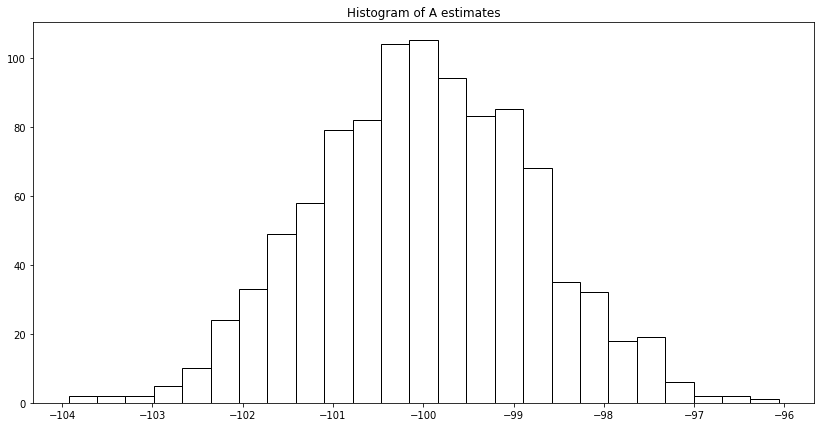

In [4]:
#Задаем размер графика в дюймах
plt.figure(figsize = (14, 7))

#Строим гистограмму с помощью функции hist для коэф-а регрессии A, настраиваем цвет границ и заливку, создаем заголовок и выводим
plt.hist(A, bins = 25, edgecolor = "black", color = "white")
plt.title("Histogram of A estimates")
plt.show()

**Длительность расчетов**

In [5]:
#Рассмотрение полученной длительности расчетов, где min - мин.значение, median - центр.значение, max - макс.значение
min(T), np.median(T), max(T)


(0.0011975765228271484, 0.001260519027709961, 0.030498266220092773)

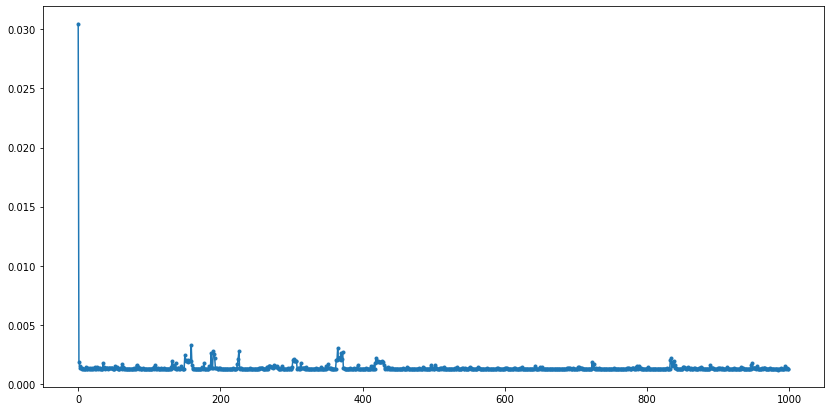

In [6]:
plt.figure(figsize = (14, 7))
plt.plot(T, marker = ".")
plt.show()

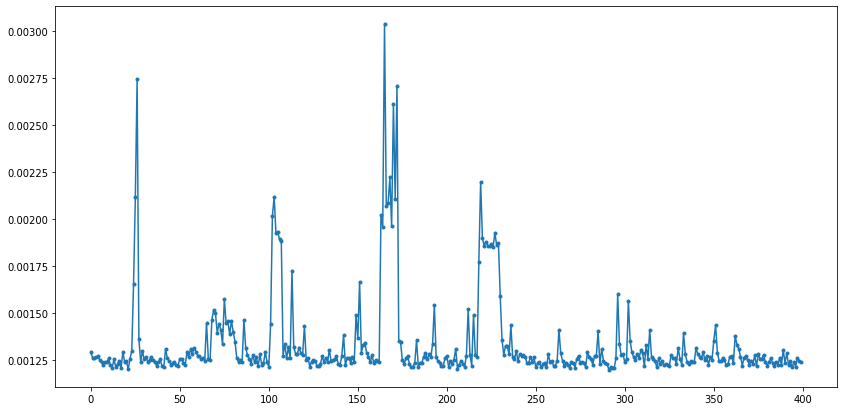

In [7]:
plt.figure(figsize = (14, 7))
plt.plot(T[200:600], marker = ".")
plt.show()

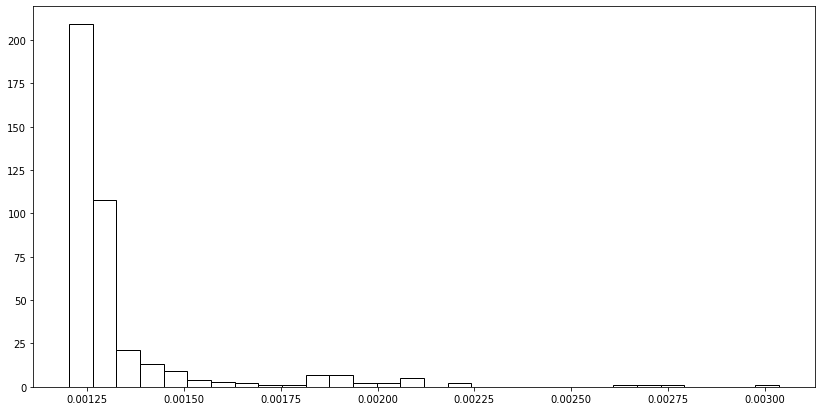

In [8]:
plt.figure(figsize = (14, 7))
plt.hist(T[200:600], bins = 30, edgecolor = "black", color = "white")
plt.show()